Paso 1: Cargar el dataset y ver las primeras filas


In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('australian_user_items.csv')

# Mostrar las primeras filas
print(df.head())

# Ver el tamaño del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


             user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamcommunity.com/id/evcentric   
3            http://steamcommunity.com/id/Riot-Punch   
4                 http://steamcommunity.com/id/doctr   

                                               items  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...  
2  [{'item_id': '1200', 'item_name': 'Red Orchest...  
3  [{'item_id': '10', 'item_name': 'Counter-Strik...  
4  [{'item_id': '300', 'item_name': 'Day of Defea..

Paso 2: Ver tipos de datos y valores nulos

In [2]:
print(df.info())
print("\nValores nulos por columna:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  int64 
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.4+ MB
None

Valores nulos por columna:
 user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64


In [3]:
import ast

# Ver cómo está guardado el campo 'items'
print(df['items'].iloc[0])
print("\nTipo actual:", type(df['items'].iloc[0]))

# Intentar convertirlo de str a lista real
example_items = ast.literal_eval(df['items'].iloc[0])
print("\nEjemplo de juego:", example_items[0])


[{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', 'playtime_forever': 4733, 'playtime_2weeks': 0}, {'item_id': '240', 'item_name': 'Counter-Strike: Source', 'playtime_forever': 1853, 'playtime_2weeks': 0}, {'item_i

Paso 3: Expandir items y normalizar los dato

In [4]:
from ast import literal_eval
import pandas as pd

# Convertir strings en listas de diccionarios
df['items'] = df['items'].apply(literal_eval)

# Expandir en un nuevo DataFrame con una fila por juego
rows = []
for _, row in df.iterrows():
    user_id = row['user_id']
    for item in row['items']:
        item['user_id'] = user_id
        rows.append(item)

df_items = pd.DataFrame(rows)

# Ver las primeras filas del nuevo DataFrame
print(df_items.head())
print(f"\nFilas: {df_items.shape[0]}, Columnas: {df_items.shape[1]}")


  item_id                  item_name  playtime_forever  playtime_2weeks  \
0      10             Counter-Strike                 6                0   
1      20      Team Fortress Classic                 0                0   
2      30              Day of Defeat                 7                0   
3      40         Deathmatch Classic                 0                0   
4      50  Half-Life: Opposing Force                 0                0   

             user_id  
0  76561197970982479  
1  76561197970982479  
2  76561197970982479  
3  76561197970982479  
4  76561197970982479  

Filas: 5153209, Columnas: 5


Paso 4: Gráficos iniciales

1. Top 20 juegos más jugados por número de usuarios

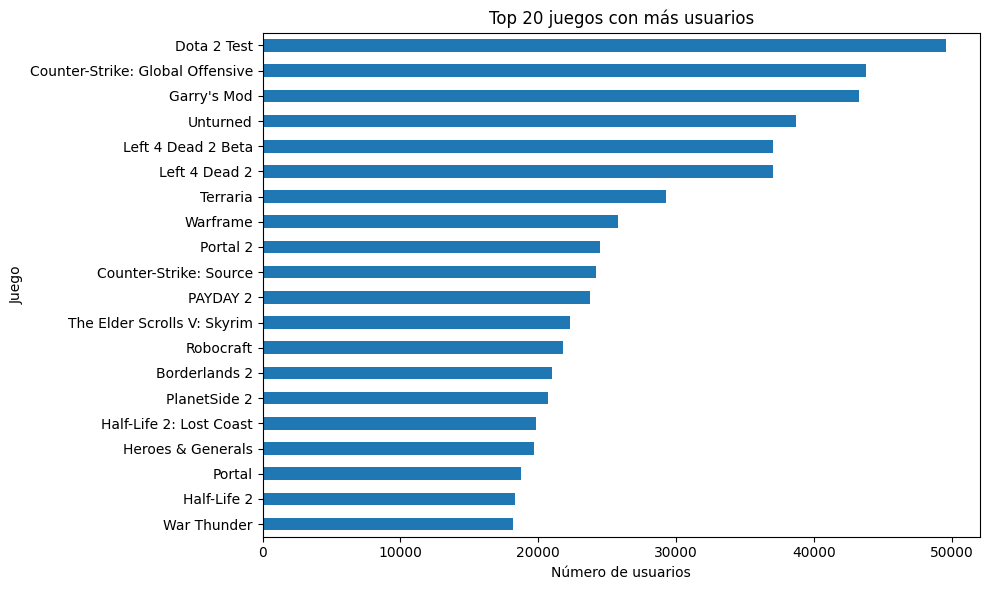

In [5]:
import matplotlib.pyplot as plt

top_games = df_items['item_name'].value_counts().head(20)

plt.figure(figsize=(10,6))
top_games.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 juegos con más usuarios")
plt.xlabel("Número de usuarios")
plt.ylabel("Juego")
plt.tight_layout()
plt.show()


2. Distribución de juegos por usuario

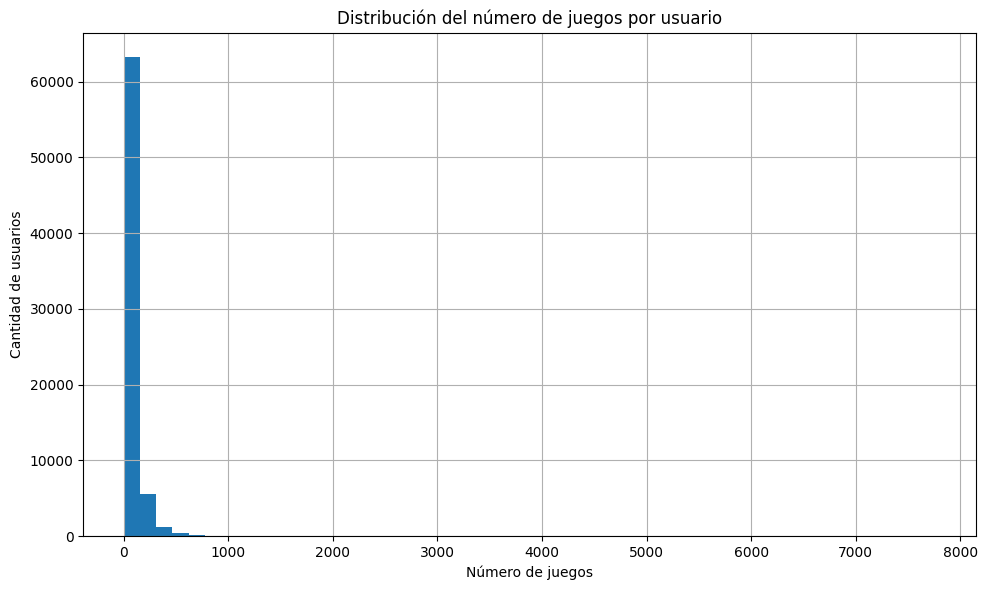

In [6]:
games_per_user = df_items.groupby('user_id')['item_id'].count()

plt.figure(figsize=(10,6))
games_per_user.hist(bins=50)
plt.title("Distribución del número de juegos por usuario")
plt.xlabel("Número de juegos")
plt.ylabel("Cantidad de usuarios")
plt.tight_layout()
plt.show()


3. Top 20 juegos más jugados por tiempo total

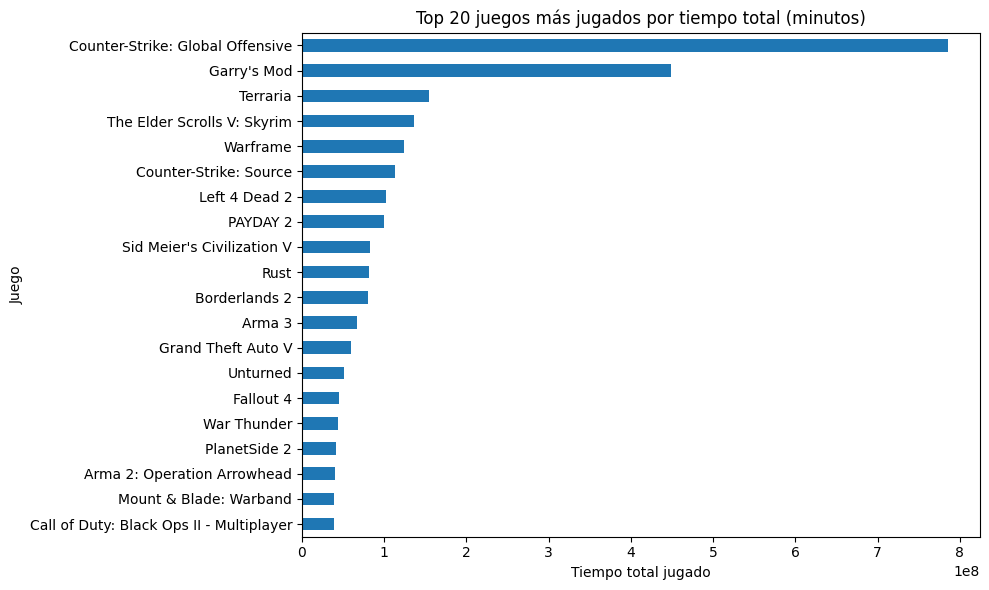

In [7]:
playtime_total = df_items.groupby('item_name')['playtime_forever'].sum()
top_played = playtime_total.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_played.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 juegos más jugados por tiempo total (minutos)")
plt.xlabel("Tiempo total jugado")
plt.ylabel("Juego")
plt.tight_layout()
plt.show()


Paso 1.1 – Filtrar juegos no jugados y usuarios con pocos juegos

In [8]:
# Eliminar juegos no jugados (playtime_forever = 0)
df_jugados = df_items[df_items['playtime_forever'] > 0].copy()

# Contar juegos jugados por usuario
juegos_por_usuario = df_jugados.groupby('user_id')['item_id'].count()

# Filtrar usuarios con al menos 5 juegos jugados
usuarios_validos = juegos_por_usuario[juegos_por_usuario >= 5].index
df_filtrado = df_jugados[df_jugados['user_id'].isin(usuarios_validos)]

print(f"Interacciones originales: {df_items.shape[0]}")
print(f"Interacciones con tiempo jugado: {df_jugados.shape[0]}")
print(f"Después de filtrar usuarios con >=5 juegos: {df_filtrado.shape[0]}")
print(f"Usuarios únicos: {df_filtrado['user_id'].nunique()}")
print(f"Juegos únicos: {df_filtrado['item_id'].nunique()}")


Interacciones originales: 5153209
Interacciones con tiempo jugado: 3285246
Después de filtrar usuarios con >=5 juegos: 3265727
Usuarios únicos: 59763
Juegos únicos: 10048


Paso 1.2 – Crear matriz de usuario-juego binaria

In [9]:
# Matriz binaria: 1 si ha jugado el juego (playtime > 0)
matriz_binaria = df_filtrado.copy()
matriz_binaria['valor'] = 1

matriz_binaria = matriz_binaria.pivot_table(index='user_id', columns='item_id', values='valor', fill_value=0)

print("Matriz binaria creada. Tamaño:", matriz_binaria.shape)


Matriz binaria creada. Tamaño: (59763, 10048)


Paso 1.3 – Crear matriz ponderada con playtime_forever

In [10]:
import numpy as np

# Copiar y aplicar logaritmo a los minutos jugados (sumamos 1 para evitar log(0))
df_playtime = df_filtrado.copy()
df_playtime['valor'] = np.log1p(df_playtime['playtime_forever'])

# Crear matriz usuario-juego ponderada
matriz_playtime = df_playtime.pivot_table(index='user_id', columns='item_id', values='valor', fill_value=0)

print("Matriz ponderada creada. Tamaño:", matriz_playtime.shape)


Matriz ponderada creada. Tamaño: (59763, 10048)


In [11]:
# Eliminar interacciones con menos de 60 minutos (1 hora)
df_jugado_60min = df_filtrado[df_filtrado['playtime_forever'] >= 60]

# Recontar juegos por usuario tras filtrar
usuarios_validos = df_jugado_60min['user_id'].value_counts()
usuarios_validos = usuarios_validos[usuarios_validos >= 5].index

df_filtrado_60min = df_jugado_60min[df_jugado_60min['user_id'].isin(usuarios_validos)]

print(f"Interacciones restantes: {df_filtrado_60min.shape[0]}")
print(f"Usuarios únicos: {df_filtrado_60min['user_id'].nunique()}")
print(f"Juegos únicos: {df_filtrado_60min['item_id'].nunique()}")


Interacciones restantes: 2305138
Usuarios únicos: 56850
Juegos únicos: 8779


FASE 2 – Clustering de usuarios

Paso 2.1 – Reducción de dimensionalidad con PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar antes de PCA
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(matriz_binaria)

# Aplicar PCA para reducir a 50 dimensiones
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Dimensiones reducidas. Nueva forma:", X_pca.shape)


Dimensiones reducidas. Nueva forma: (59763, 50)


Paso 2.2 – Aplicar KMeans

In [13]:
# Crear matriz binaria (juegos con al menos 60 min jugados)
df_binaria_60min = df_filtrado_60min.copy()
df_binaria_60min['valor'] = 1

matriz_binaria_60min = df_binaria_60min.pivot_table(
    index='user_id',
    columns='item_id',
    values='valor',
    fill_value=0
)

print("Matriz binaria limpia creada. Tamaño:", matriz_binaria_60min.shape)


Matriz binaria limpia creada. Tamaño: (56850, 8779)


Paso 2.3 – Clustering con KMeans


In [14]:
from sklearn.cluster import KMeans

# Aplicar KMeans directamente sobre la matriz limpia
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(matriz_binaria_60min)

# Añadir clusters a la matriz
matriz_binaria_60min['cluster'] = clusters

# Ver distribución de usuarios por cluster
print(matriz_binaria_60min['cluster'].value_counts().sort_index())


cluster
0        1
1    30756
2     4137
3    10550
4    11406
Name: count, dtype: int64


 Paso 2.4 – Juegos más jugados por cluster

In [16]:
# Necesitamos el dataframe original de interacciones filtrado con tiempo >= 60 min
# y el cluster asociado a cada usuario

# Merge entre df_filtrado_60min y los clusters
df_clusters = df_filtrado_60min.merge(
    matriz_binaria_60min['cluster'],
    left_on='user_id',
    right_index=True
)

# Agrupar por cluster y juego para contar cuántos usuarios de ese cluster jugaron ese juego
top_juegos_por_cluster = (
    df_clusters.groupby(['cluster', 'item_name'])['user_id']
    .nunique()
    .reset_index(name='n_usuarios')
)

# Elegir los 10 juegos más jugados por cluster
top_juegos_cluster = (
    top_juegos_por_cluster.sort_values(['cluster', 'n_usuarios'], ascending=[True, False])
    .groupby('cluster')
    .head(10)
)

# Mostrar los 10 juegos más jugados por cada cluster
for cluster_id in sorted(top_juegos_cluster['cluster'].unique()):
    print(f"\n🧩 Top 10 juegos del cluster {cluster_id}:\n")
    top_juegos = top_juegos_cluster[top_juegos_cluster['cluster'] == cluster_id]
    for _, row in top_juegos.iterrows():
        print(f"{row['item_name']} — {row['n_usuarios']} usuarios")




🧩 Top 10 juegos del cluster 0:

Alien: Isolation — 1 usuarios
Arma 2 — 1 usuarios
Arma 2: DayZ Mod — 1 usuarios
Arma 2: Operation Arrowhead — 1 usuarios
Arma 2: Operation Arrowhead Beta (Obsolete) — 1 usuarios
Aura Kingdom — 1 usuarios
BlazBlue: Calamity Trigger — 1 usuarios
Card Hunter — 1 usuarios
Counter-Strike: Global Offensive — 1 usuarios
Cry of Fear — 1 usuarios

🧩 Top 10 juegos del cluster 1:

Counter-Strike: Global Offensive — 17678 usuarios
Garry's Mod — 16301 usuarios
Left 4 Dead 2 — 12024 usuarios
Unturned — 11410 usuarios
Terraria — 8014 usuarios
Warframe — 6263 usuarios
Portal 2 — 6121 usuarios
Counter-Strike: Source — 5803 usuarios
PAYDAY 2 — 5123 usuarios
The Elder Scrolls V: Skyrim — 4853 usuarios

🧩 Top 10 juegos del cluster 2:

Left 4 Dead 2 — 3666 usuarios
Counter-Strike: Global Offensive — 3655 usuarios
Garry's Mod — 3561 usuarios
The Elder Scrolls V: Skyrim — 3540 usuarios
Terraria — 3527 usuarios
Borderlands 2 — 3416 usuarios
PAYDAY 2 — 3301 usuarios
Portal 2 — 

FASE 3 – Entrenamiento del recomendador con LightFM

Paso 3.1 – Preparar los datos para LightFM

In [17]:
from scipy.sparse import csr_matrix

# Eliminar usuarios del cluster 0 (el outlier)
matriz_modelo = matriz_playtime.loc[matriz_binaria_60min[matriz_binaria_60min['cluster'] != 0].index]

# Crear matriz de interacciones en formato sparse
interactions = csr_matrix(matriz_modelo.values)

# Mapear índices reales a posiciones
user_ids = matriz_modelo.index.tolist()
item_ids = matriz_modelo.columns.tolist()

print("Matriz de interacciones creada. Tamaño:", interactions.shape)


Matriz de interacciones creada. Tamaño: (56849, 10048)


Paso 3.2 – Crear user_features con los clusters

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Obtener solo los usuarios válidos con cluster distinto de 0
usuarios_validos = matriz_modelo.index
clusters_filtrados = matriz_binaria_60min.loc[usuarios_validos, ['cluster']]

# One-hot encoding de los clusters
encoder = OneHotEncoder()
user_features_array = encoder.fit_transform(clusters_filtrados)

print("Matriz user_features creada. Forma:", user_features_array.shape)


Matriz user_features creada. Forma: (56849, 4)


Paso 3.3 – Entrenar modelo LightFM

In [19]:
from lightfm import LightFM
from lightfm.data import Dataset

# Entrenar modelo
model = LightFM(loss='warp', random_state=42)
model.fit(interactions, user_features=user_features_array, epochs=15, num_threads=4)


Paso 3.4 – Evaluar el modelo

In [20]:
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Dividir en 80% train, 20% test
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=42)

# Entrenar sobre train
model = LightFM(loss='warp', random_state=42)
model.fit(train, user_features=user_features_array, epochs=15, num_threads=4)

# Evaluar sobre test
precision = precision_at_k(model, test, user_features=user_features_array, k=10).mean()
recall = recall_at_k(model, test, user_features=user_features_array, k=10).mean()

print(f"📈 Precision@10: {precision:.4f}")
print(f"📈 Recall@10:    {recall:.4f}")


📈 Precision@10: 0.1055
📈 Recall@10:    0.1416


Paso 3.5 – Ajuste de hiperparámetros

In [21]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.cross_validation import random_train_test_split

# Dividir en train/test de nuevo
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=42)

# Parámetros a probar
losses = ['warp', 'bpr', 'warp-kos']
components = [32, 64, 128]
learning_rates = [0.01, 0.05, 0.1]

mejores_resultados = []

for loss in losses:
    for no_components in components:
        for lr in learning_rates:
            model = LightFM(loss=loss, no_components=no_components, learning_rate=lr, random_state=42)
            model.fit(train, user_features=user_features_array, epochs=10, num_threads=4)
            prec = precision_at_k(model, test, user_features=user_features_array, k=10).mean()
            print(f"🔍 {loss} | {no_components} components | lr={lr:.3f} → precision@10: {prec:.4f}")
            mejores_resultados.append((loss, no_components, lr, prec))

# Mostrar el mejor
mejor = max(mejores_resultados, key=lambda x: x[3])
print(f"\n✅ Mejor configuración: {mejor[0]} | {mejor[1]} components | lr={mejor[2]} → precision@10: {mejor[3]:.4f}")


🔍 warp | 32 components | lr=0.010 → precision@10: 0.1055
🔍 warp | 32 components | lr=0.050 → precision@10: 0.1053
🔍 warp | 32 components | lr=0.100 → precision@10: 0.1052
🔍 warp | 64 components | lr=0.010 → precision@10: 0.1055
🔍 warp | 64 components | lr=0.050 → precision@10: 0.1056
🔍 warp | 64 components | lr=0.100 → precision@10: 0.1054
🔍 warp | 128 components | lr=0.010 → precision@10: 0.1054
🔍 warp | 128 components | lr=0.050 → precision@10: 0.1052
🔍 warp | 128 components | lr=0.100 → precision@10: 0.1056
🔍 bpr | 32 components | lr=0.010 → precision@10: 0.0685
🔍 bpr | 32 components | lr=0.050 → precision@10: 0.0493
🔍 bpr | 32 components | lr=0.100 → precision@10: 0.0515
🔍 bpr | 64 components | lr=0.010 → precision@10: 0.0601
🔍 bpr | 64 components | lr=0.050 → precision@10: 0.0469
🔍 bpr | 64 components | lr=0.100 → precision@10: 0.0441
🔍 bpr | 128 components | lr=0.010 → precision@10: 0.0566
🔍 bpr | 128 components | lr=0.050 → precision@10: 0.0493
🔍 bpr | 128 components | lr=0.100 

Paso 4.1 – Obtener información de los juegos

In [41]:
import requests
import pandas as pd

# 🔑 Elige una de tus claves (puedes rotarlas si haces más cosas luego)
STEAM_API_KEY = 'F5E52AD27E9DC7006A2068AA05B6EE04'  # Diego

# 🔁 Cargar item_ids que tú ya tienes (columnas de la matriz de juegos)
item_ids = list(matriz_modelo.columns.astype(str))

# 📦 Llamada al endpoint oficial de Steam
print("📥 Descargando listado de juegos oficiales de Steam...")
url = f'https://api.steampowered.com/ISteamApps/GetAppList/v2/'
response = requests.get(url)
data = response.json()

# ✅ Extraer todos los app_ids oficiales
steam_apps = data['applist']['apps']
app_ids_validos = set(str(app['appid']) for app in steam_apps)

# ✂️ Filtrar tus juegos con los que sí existen oficialmente
item_ids_filtrados = [app_id for app_id in item_ids if app_id in app_ids_validos]

# 💾 Guardar para usarlos luego en el scraping
pd.DataFrame({'item_id': item_ids_filtrados}).to_csv('item_ids_filtrados.csv', index=False)

print(f"✅ De {len(item_ids)} juegos, se han filtrado {len(item_ids_filtrados)} válidos oficialmente.")


📥 Descargando listado de juegos oficiales de Steam...
✅ De 10048 juegos, se han filtrado 7424 válidos oficialmente.


In [42]:
df_ids = pd.read_csv('item_ids_filtrados.csv')
item_ids = df_ids['item_id'].astype(str).tolist()


In [1]:
import pandas as pd
import requests
import time
import os

# 🔧 Configuración
GUARDAR_CADA = 50
OUTPUT_PATH = 'item_metadata_steam.csv'
ERRORES_PATH = 'errores.csv'
PENDIENTES_PATH = 'pendientes.csv'
ESPERA_ENTRE_JUEGOS = 0.5
MAX_REINTENTOS = 3

# 📥 Cargar juegos válidos desde el filtrado oficial
df_ids = pd.read_csv('item_ids_filtrados.csv')
item_ids = df_ids['item_id'].astype(str).tolist()

# 🔁 Reanudar si ya existen resultados previos
procesados = set()
datos_juegos = []
errores = []
pendientes = []

if os.path.exists(OUTPUT_PATH):
    df_existente = pd.read_csv(OUTPUT_PATH)
    procesados = set(df_existente['item_id'].astype(str))
    datos_juegos = df_existente.to_dict('records')
    print(f"🔁 Reanudando. Ya hay {len(procesados)} juegos guardados.")

if os.path.exists(ERRORES_PATH):
    errores = pd.read_csv(ERRORES_PATH)['item_id'].astype(str).tolist()

if os.path.exists(PENDIENTES_PATH):
    pendientes = pd.read_csv(PENDIENTES_PATH)['item_id'].astype(str).tolist()

# 🧠 Función robusta con reintentos
def obtener_info_juego(app_id):
    url = f"https://store.steampowered.com/api/appdetails?appids={app_id}"
    for intento in range(MAX_REINTENTOS):
        try:
            r = requests.get(url, timeout=15)
            data = r.json()

            if data and str(app_id) in data:
                juego = data[str(app_id)]
                if juego.get('success', False) and 'data' in juego:
                    info = juego['data']
                    return {
                        'item_id': str(app_id),
                        'genres': [g['description'] for g in info.get('genres', [])],
                        'categories': [c['description'] for c in info.get('categories', [])],
                        'tags': list(info.get('tags', {}).keys()) if 'tags' in info else []
                    }
                else:
                    print(f"⛔ {app_id} → success: False o sin datos")
                    errores.append(str(app_id))
                    return None
        except Exception as e:
            print(f"⚠️ [{intento+1}/{MAX_REINTENTOS}] Error con {app_id}: {e}")
            time.sleep(3)

    print(f"❌ {app_id} → Error de red persistente. Añadiendo a pendientes.")
    pendientes.append(str(app_id))
    return None

# 🚀 Proceso principal
for idx, app_id in enumerate(item_ids):
    if app_id in procesados or app_id in errores or app_id in pendientes:
        continue

    info = obtener_info_juego(app_id)
    if info:
        datos_juegos.append(info)
        procesados.add(app_id)

    time.sleep(ESPERA_ENTRE_JUEGOS)

    if len(datos_juegos) % GUARDAR_CADA == 0:
        pd.DataFrame(datos_juegos).to_csv(OUTPUT_PATH, index=False)
        pd.DataFrame({'item_id': errores}).to_csv(ERRORES_PATH, index=False)
        pd.DataFrame({'item_id': pendientes}).to_csv(PENDIENTES_PATH, index=False)
        print(f"💾 Guardados {len(datos_juegos)} juegos...")

# 💾 Guardar al final
pd.DataFrame(datos_juegos).to_csv(OUTPUT_PATH, index=False)
pd.DataFrame({'item_id': errores}).to_csv(ERRORES_PATH, index=False)
pd.DataFrame({'item_id': pendientes}).to_csv(PENDIENTES_PATH, index=False)
print("✅ Finalizado y guardado todo.")


⛔ 109410 → success: False o sin datos
⛔ 113900 → success: False o sin datos
⛔ 203850 → success: False o sin datos
⛔ 205180 → success: False o sin datos
💾 Guardados 50 juegos...
⛔ 205790 → success: False o sin datos
⛔ 205890 → success: False o sin datos
⛔ 205930 → success: False o sin datos
⛔ 206740 → success: False o sin datos
⛔ 206980 → success: False o sin datos
⛔ 207060 → success: False o sin datos
⛔ 207210 → success: False o sin datos
💾 Guardados 100 juegos...
⛔ 207890 → success: False o sin datos
⛔ 208030 → success: False o sin datos
⛔ 208610 → success: False o sin datos
⛔ 209340 → success: False o sin datos
💾 Guardados 150 juegos...
⛔ 210410 → success: False o sin datos
⛔ 210990 → success: False o sin datos
⛔ 211070 → success: False o sin datos
⛔ 211380 → success: False o sin datos
⛔ 211880 → success: False o sin datos
⛔ 212180 → success: False o sin datos
⛔ 212200 → success: False o sin datos
⛔ 212220 → success: False o sin datos
⛔ 212240 → success: False o sin datos
⛔ 212370 → 

In [5]:
import pandas as pd
import requests
import time
import os

# 📁 Archivos
OUTPUT_PATH = 'item_metadata_steam.csv'
PENDIENTES_PATH = 'pendientes.csv'

# ⚙️ Configuración
MAX_REINTENTOS = 3
ESPERA_ENTRE_JUEGOS = 0.5

# 🧠 Función para obtener metadatos
def obtener_info_juego(app_id):
    url = f"https://store.steampowered.com/api/appdetails?appids={app_id}"
    for intento in range(MAX_REINTENTOS):
        try:
            r = requests.get(url, timeout=15)
            data = r.json()
            if data and str(app_id) in data:
                juego = data[str(app_id)]
                if juego.get('success', False) and 'data' in juego:
                    info = juego['data']
                    return {
                        'item_id': str(app_id),
                        'genres': [g['description'] for g in info.get('genres', [])],
                        'categories': [c['description'] for c in info.get('categories', [])],
                        'tags': list(info.get('tags', {}).keys()) if 'tags' in info else []
                    }
        except Exception as e:
            print(f"⚠️ [{intento+1}/{MAX_REINTENTOS}] Error con {app_id}: {e}")
            time.sleep(3)
    print(f"❌ {app_id} → sigue fallando.")
    return None

# 🔁 Bucle continuo mientras haya pendientes
while True:
    if not os.path.exists(PENDIENTES_PATH):
        print("❌ No existe 'pendientes.csv'. Nada que hacer.")
        break

    pendientes_df = pd.read_csv(PENDIENTES_PATH, dtype=str)
    if pendientes_df.empty:
        print("✅ Todos los juegos han sido procesados.")
        break

    pendientes = pendientes_df['item_id'].tolist()

    # Cargar juegos ya procesados
    if os.path.exists(OUTPUT_PATH):
        procesados = set(pd.read_csv(OUTPUT_PATH, usecols=['item_id'], dtype=str)['item_id'])
        datos_existentes = pd.read_csv(OUTPUT_PATH)
    else:
        procesados = set()
        datos_existentes = pd.DataFrame()

    actualizados = False

    print(f"🔁 Procesando {len(pendientes)} juegos pendientes...")
    nuevos_pendientes = []

    for app_id in pendientes:
        if app_id in procesados:
            print(f"✅ {app_id} ya estaba procesado. Eliminado de pendientes.")
            continue

        info = obtener_info_juego(app_id)
        if info:
            print(f"📝 Guardando datos de {app_id}...")
            datos_existentes = pd.concat([datos_existentes, pd.DataFrame([info])], ignore_index=True)
            datos_existentes.to_csv(OUTPUT_PATH, index=False)
            actualizados = True
        else:
            nuevos_pendientes.append(app_id)

        time.sleep(ESPERA_ENTRE_JUEGOS)

    # Guardar nuevos pendientes
    pd.DataFrame({'item_id': nuevos_pendientes}).to_csv(PENDIENTES_PATH, index=False)

    if not nuevos_pendientes:
        print("🎉 ¡Todos los juegos se han procesado correctamente!")
        break
    elif not actualizados:
        print("🔁 Reintentando todos los juegos que siguen fallando...")
        time.sleep(5)


🔁 Procesando 54 juegos pendientes...
❌ 234060 → sigue fallando.
❌ 234530 → sigue fallando.
❌ 234740 → sigue fallando.
❌ 234980 → sigue fallando.


KeyboardInterrupt: 

In [6]:
import pandas as pd
import ast

# Archivos
RUTA_ORIGINAL = 'australian_user_items.csv'
RUTA_PENDIENTES = 'pendientes.csv'
RUTA_SALIDA = 'australian_user_items_filtrado.csv'

# 📥 Cargar datasets
df = pd.read_csv(RUTA_ORIGINAL)
pendientes = set(pd.read_csv(RUTA_PENDIENTES, dtype=str)['item_id'])

print(f"🧹 Eliminando juegos con item_id en pendientes.csv ({len(pendientes)} juegos a eliminar)...")

# 🧩 Función para limpiar cada fila
def filtrar_items(items_str):
    try:
        items = ast.literal_eval(items_str)
        items_filtrados = [i for i in items if i['item_id'] not in pendientes]
        return items_filtrados
    except:
        return []

# Aplicar limpieza
df['items'] = df['items'].apply(lambda x: filtrar_items(x))
df['items_count'] = df['items'].apply(len)

# Eliminar usuarios sin juegos
df = df[df['items_count'] > 0].reset_index(drop=True)

# Guardar resultado
df.to_csv(RUTA_SALIDA, index=False)
print(f"✅ Dataset limpio guardado en '{RUTA_SALIDA}' con shape: {df.shape}")


🧹 Eliminando juegos con item_id en pendientes.csv (54 juegos a eliminar)...
✅ Dataset limpio guardado en 'australian_user_items_filtrado.csv' con shape: (71502, 5)


In [7]:
import pandas as pd

# Rutas
RUTA_ORIGINAL = "australian_user_items.csv"
RUTA_FILTRADO = "australian_user_items_filtrado.csv"

# Cargar datasets
df_original = pd.read_csv(RUTA_ORIGINAL)
df_filtrado = pd.read_csv(RUTA_FILTRADO)

# Cálculo
usuarios_original = df_original.shape[0]
usuarios_filtrados = df_filtrado.shape[0]
eliminados = usuarios_original - usuarios_filtrados

print(f"👥 Usuarios originales: {usuarios_original}")
print(f"✅ Usuarios tras limpieza: {usuarios_filtrados}")
print(f"🗑️ Usuarios eliminados (sin juegos válidos): {eliminados}")


👥 Usuarios originales: 88310
✅ Usuarios tras limpieza: 71502
🗑️ Usuarios eliminados (sin juegos válidos): 16808


In [8]:
import pandas as pd

# 📁 Ruta del dataset limpio
RUTA_ENTRADA = "australian_user_items_filtrado.csv"
RUTA_SALIDA = "australian_user_items_final.csv"

# 🔍 Cargar datos
df = pd.read_csv(RUTA_ENTRADA)
print(f"📥 Cargado: {df.shape}")

# 🎮 Calcular frecuencia de cada juego
juegos_con_usuarios = df['items'].apply(eval).explode().apply(lambda x: x['item_id'])
frecuencia_juegos = juegos_con_usuarios.value_counts()

# 🗑️ Identificar juegos sin ningún usuario (aparecerán 0 veces después de limpieza)
juegos_validos = set(frecuencia_juegos.index.astype(str))

# 🧹 Eliminar juegos huérfanos de cada usuario
def filtrar_juegos_validos(lista):
    return [j for j in eval(lista) if j['item_id'] in juegos_validos]

df['items'] = df['items'].apply(filtrar_juegos_validos)

# ❌ Eliminar usuarios sin juegos tras esta limpieza final
df = df[df['items'].map(len) > 0]

# 💾 Guardar resultado final
df.to_csv(RUTA_SALIDA, index=False)
print(f"✅ Dataset final guardado en '{RUTA_SALIDA}' con shape: {df.shape}")


📥 Cargado: (71502, 5)
✅ Dataset final guardado en 'australian_user_items_final.csv' con shape: (71502, 5)


In [14]:
import pandas as pd

# Configuración
RUTA = "australian_user_items_final.csv"
RUTA_SALIDA = "australian_user_items_filtrado_1h.csv"
MINUTOS_UMBRAL = 60

# 📥 Cargar datos
print("📥 Cargando datos...")
df = pd.read_csv(RUTA)

# 🧹 Filtrar juegos con más de 60 minutos
def filtrar_juegos(juegos_raw):
    try:
        juegos = eval(juegos_raw)
        return [j for j in juegos if j.get("playtime_forever", 0) >= MINUTOS_UMBRAL]
    except:
        return []

print("🧼 Filtrando juegos con menos de 1h jugada...")
df["items_filtrados"] = df["items"].apply(filtrar_juegos)
df["n_items"] = df["items_filtrados"].apply(len)
df_filtrado = df[df["n_items"] > 0].drop(columns=["items", "n_items"])
df_filtrado = df_filtrado.rename(columns={"items_filtrados": "items"})

# 💾 Guardar
df_filtrado.to_csv(RUTA_SALIDA, index=False)
print(f"✅ Dataset filtrado guardado en '{RUTA_SALIDA}' con shape: {df_filtrado.shape}")


📥 Cargando datos...
🧼 Filtrando juegos con menos de 1h jugada...
✅ Dataset filtrado guardado en 'australian_user_items_filtrado_1h.csv' con shape: (67887, 5)


In [1]:
import pandas as pd

# 📁 Rutas
RUTA_ENTRADA = "australian_user_items_final.csv"
RUTA_SALIDA = "australian_user_items_1h_limpio.csv"
MINUTOS_UMBRAL = 60  # Mínimo 1 hora jugada

# 📥 Cargar dataset
print("📥 Cargando datos...")
df = pd.read_csv(RUTA_ENTRADA)

# 🧹 Filtrar juegos con al menos 60 minutos
def filtrar_juegos(juegos_raw):
    try:
        juegos = eval(juegos_raw)
        return [j for j in juegos if j.get("playtime_forever", 0) >= MINUTOS_UMBRAL]
    except:
        return []

print("🧼 Filtrando juegos con menos de 1h jugada...")
df["items_filtrados"] = df["items"].apply(filtrar_juegos)

# 🗑️ Eliminar usuarios que se quedan sin juegos válidos
df["n_juegos_validos"] = df["items_filtrados"].apply(len)
df_limpio = df[df["n_juegos_validos"] > 0].copy()

# 🔁 Reemplazar columna original y limpiar
df_limpio = df_limpio.drop(columns=["items", "n_juegos_validos"])
df_limpio = df_limpio.rename(columns={"items_filtrados": "items"})

# 💾 Guardar resultado
df_limpio.to_csv(RUTA_SALIDA, index=False)
print(f"✅ Dataset limpio guardado en '{RUTA_SALIDA}' con shape: {df_limpio.shape}")


📥 Cargando datos...
🧼 Filtrando juegos con menos de 1h jugada...
✅ Dataset limpio guardado en 'australian_user_items_1h_limpio.csv' con shape: (67887, 5)


✅ Dataset cargado: (67887, 5)
✅ Interacciones expandidas: (2326284, 6)
👥 Usuarios únicos: 67295
🎮 Juegos únicos: 8759

📈 Interacciones por usuario (describe):
count    67295.000000
mean        34.568452
std         52.208417
min          1.000000
25%          8.000000
50%         21.000000
75%         45.000000
max       2568.000000
Name: item_id, dtype: float64

📈 Interacciones por juego (describe):
count     8759.000000
mean       265.587852
std       1330.887203
min          1.000000
25%          4.000000
50%         18.000000
75%         80.000000
max      42240.000000
Name: user_id, dtype: float64


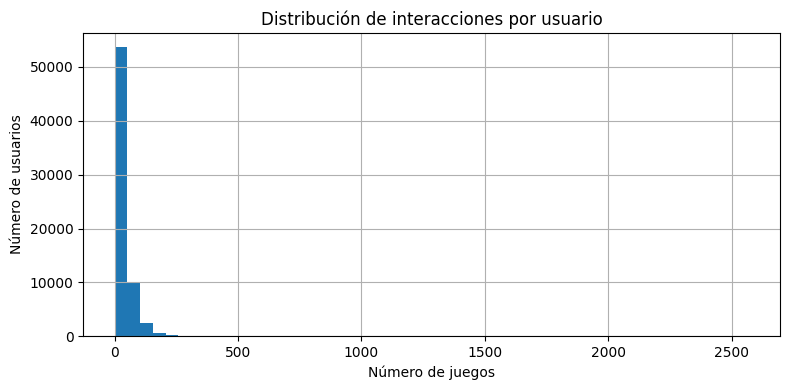

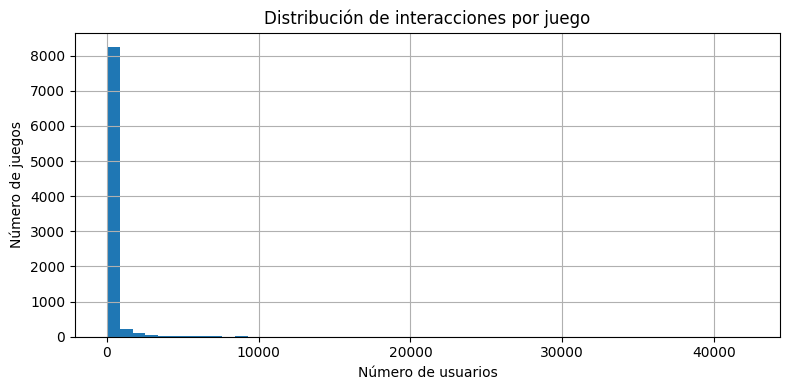

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 📥 Cargar dataset
df = pd.read_csv("australian_user_items_1h_limpio.csv")
print(f"✅ Dataset cargado: {df.shape}")

# 🧼 Asegurar tipos
df = df[df["items"].notna()]
df["items"] = df["items"].apply(eval)  # convertir texto en lista de dicts

# 🧨 Expandir items
df_expandido = df.explode("items")
df_expandido["item_id"] = df_expandido["items"].apply(lambda x: x["item_id"])
df_expandido["user_id"] = df_expandido["user_id"].astype(str)
df_expandido["item_id"] = df_expandido["item_id"].astype(str)

print(f"✅ Interacciones expandidas: {df_expandido.shape}")

# 📊 Número de usuarios y juegos únicos
n_usuarios = df_expandido["user_id"].nunique()
n_juegos = df_expandido["item_id"].nunique()
print(f"👥 Usuarios únicos: {n_usuarios}")
print(f"🎮 Juegos únicos: {n_juegos}")

# 📊 Interacciones por usuario
interacciones_usuario = df_expandido.groupby("user_id")["item_id"].count()
print("\n📈 Interacciones por usuario (describe):")
print(interacciones_usuario.describe())

# 📊 Interacciones por juego
interacciones_juego = df_expandido.groupby("item_id")["user_id"].count()
print("\n📈 Interacciones por juego (describe):")
print(interacciones_juego.describe())

# 📉 Histograma: Interacciones por usuario
plt.figure(figsize=(8, 4))
interacciones_usuario.hist(bins=50)
plt.title("Distribución de interacciones por usuario")
plt.xlabel("Número de juegos")
plt.ylabel("Número de usuarios")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Histograma: Interacciones por juego
plt.figure(figsize=(8, 4))
interacciones_juego.hist(bins=50)
plt.title("Distribución de interacciones por juego")
plt.xlabel("Número de usuarios")
plt.ylabel("Número de juegos")
plt.grid(True)
plt.tight_layout()
plt.show()


📥 Cargando metadata...


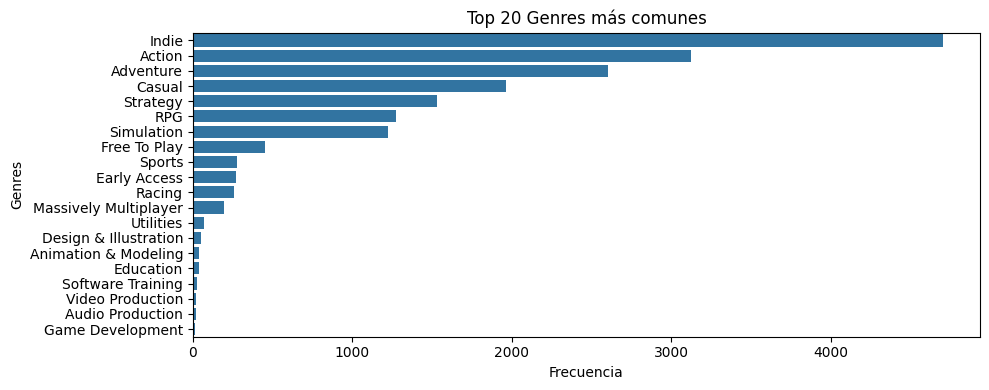


🔍 Top 20 GENRES:
Indie                          4699
Action                         3125
Adventure                      2605
Casual                         1965
Strategy                       1530
RPG                            1274
Simulation                     1223
Free To Play                   453
Sports                         274
Early Access                   269
Racing                         256
Massively Multiplayer          193
Utilities                      70
Design & Illustration          52
Animation & Modeling           38
Education                      36
Software Training              28
Video Production               21
Audio Production               17
Game Development               16


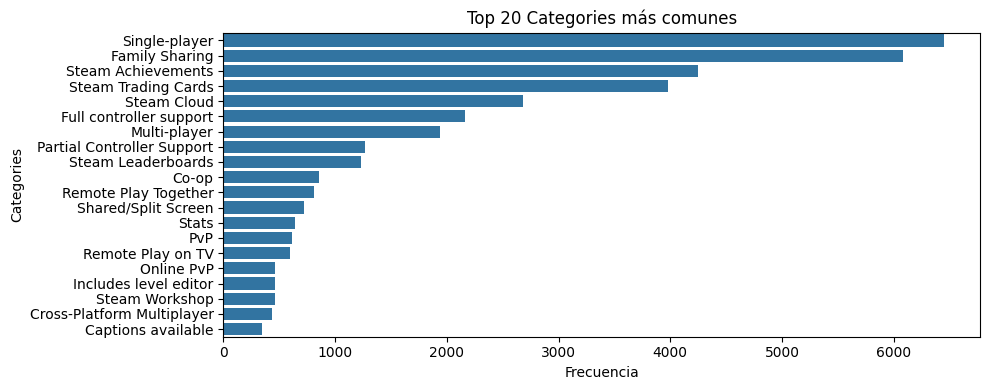


🔍 Top 20 CATEGORIES:
Single-player                  6449
Family Sharing                 6085
Steam Achievements             4246
Steam Trading Cards            3980
Steam Cloud                    2680
Full controller support        2166
Multi-player                   1936
Partial Controller Support     1270
Steam Leaderboards             1229
Co-op                          859
Remote Play Together           812
Shared/Split Screen            721
Stats                          639
PvP                            615
Remote Play on TV              599
Online PvP                     467
Includes level editor          466
Steam Workshop                 461
Cross-Platform Multiplayer     437
Captions available             344
❌ No hay datos suficientes para tags.


In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Leer dataset ---
RUTA_METADATA = "item_metadata_steam.csv"
print("📥 Cargando metadata...")
df = pd.read_csv(RUTA_METADATA)
df["item_id"] = df["item_id"].astype(str)

# --- Asegurar que las columnas son listas ---
for col in ["genres", "categories", "tags"]:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])

# --- Contar frecuencias ---
frecuencias = {
    "genres": Counter(),
    "categories": Counter(),
    "tags": Counter()
}

for _, row in df.iterrows():
    for tipo in ["genres", "categories", "tags"]:
        frecuencias[tipo].update(row[tipo])

# --- Mostrar Top 20 ---
for tipo, counter in frecuencias.items():
    top_feats = counter.most_common(20)

    if not top_feats:
        print(f"❌ No hay datos suficientes para {tipo}.")
        continue

    etiquetas, valores = zip(*top_feats)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=valores, y=etiquetas)
    plt.title(f"Top 20 {tipo.capitalize()} más comunes")
    plt.xlabel("Frecuencia")
    plt.ylabel(tipo.capitalize())
    plt.tight_layout()
    plt.show()

    # También imprimir por consola
    print(f"\n🔍 Top 20 {tipo.upper()}:")
    for et, val in zip(etiquetas, valores):
        print(f"{et:<30} {val}")


In [14]:
import pandas as pd
import ast

# --- Paso 1: Cargar interacciones ---
print("📥 Cargando interacciones...")
df = pd.read_csv("australian_user_items_1h_limpio.csv")

# Eliminar registros con 'items' vacíos o nulos
df = df[df["items"].notna()]
df["items"] = df["items"].apply(ast.literal_eval)  # convertir string a lista real

# Explode para tener una fila por juego
interacciones = df.explode("items")
interacciones = interacciones[interacciones["items"].notna()]

# Extraer item_id de cada dict
def extraer_item_id(x):
    try:
        if isinstance(x, str):
            x = ast.literal_eval(x)
        if isinstance(x, dict):
            return x.get("item_id")
    except:
        return None

interacciones["item_id"] = interacciones["items"].apply(extraer_item_id)

# Limpiar NaNs si los hubiera
interacciones = interacciones.dropna(subset=["item_id"])
interacciones["item_id"] = interacciones["item_id"].astype(str)
interacciones["user_id"] = interacciones["user_id"].astype(str)
interacciones["valor"] = 1

print(f"✅ Interacciones expandidas: {interacciones.shape}")
print(interacciones.head())


📥 Cargando interacciones...
✅ Interacciones expandidas: (2326284, 7)
             user_id  items_count           steam_id  \
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   
0  76561197970982479          276  76561197970982479   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   
0  http://steamcommunity.com/profiles/76561197970...   

                                               items item_id  valor  
0  {'item_id': '300', 'item_name': 'Day of Defeat...     300      1  
0  {'item_id': '240', 'item_name': 'Counter-Strik...     240      1  
0  {'item_id': '3830', 'item_name': 'Psychonaut

In [15]:
import pandas as pd
import ast

# --- Configuración ---
RUTA_METADATA = "item_metadata_steam.csv"
RUTA_INTERACCIONES = "australian_user_items_1h_limpio.csv"
RUTA_SALIDA = "item_features_debug.csv"

# --- Paso 1: Cargar metadata e interacciones ---
print("📥 Cargando metadata y interacciones...")
metadata = pd.read_csv(RUTA_METADATA)
interacciones = pd.read_csv(RUTA_INTERACCIONES)

# Asegurar tipos
metadata["item_id"] = metadata["item_id"].astype(str)
interacciones = interacciones[interacciones["items"].notna()]
interacciones["items"] = interacciones["items"].apply(eval)
interacciones = interacciones.explode("items")
interacciones["item_id"] = interacciones["items"].apply(lambda x: str(x["item_id"]))

# Filtrar metadata a los items que aparecen en interacciones
item_ids_validos = set(interacciones["item_id"])
metadata = metadata[metadata["item_id"].isin(item_ids_validos)].copy()

# Convertir columnas string a listas
for col in ["genres", "categories", "tags"]:
    metadata[col] = metadata[col].apply(lambda x: ast.literal_eval(str(x)) if pd.notna(x) else [])

# Combinar en una columna unificada
metadata["features"] = metadata.apply(
    lambda row: list(set(row["genres"] + row["categories"] + row["tags"])),
    axis=1
)

# Guardar solo item_id y features
features_debug = metadata[["item_id", "features"]].explode("features").dropna()
features_debug["features"] = features_debug["features"].astype(str)
features_debug = features_debug.sort_values(by="item_id")

# Guardar como CSV para inspección
features_debug.to_csv(RUTA_SALIDA, index=False)
print(f"✅ Dataset de features guardado en '{RUTA_SALIDA}' con shape: {features_debug.shape}")



📥 Cargando metadata y interacciones...


KeyboardInterrupt: 

In [18]:
import pandas as pd

features_df = pd.read_csv("item_features_debug.csv")

# 🧹 Cargar y limpiar
features_df["item_id"] = features_df["item_id"].astype(str).str.strip()
features_df["features"] = features_df["features"].astype(str).str.strip()

# ❌ Filtrar features vacías o no imprimibles
features_df = features_df[features_df["features"].str.len() > 1]
features_df = features_df[features_df["features"].apply(lambda x: x.isprintable())]

# 🔁 Convertir todo a minúsculas si lo prefieres
features_df["features"] = features_df["features"].str.lower()

# 🧩 Agrupar features por item_id
features_por_item = (
    features_df.groupby("item_id")["features"]
    .apply(list)
    .reset_index()
    .values.tolist()
)  # esto da lista de (item_id, [features])

# 🧱 Fit con item_features exactas
all_users = interacciones["user_id"].astype(str).unique().tolist()
all_items = interacciones["item_id"].astype(str).unique().tolist()
all_features = features_df["features"].unique().tolist()

from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(users=all_users, items=all_items)
dataset.fit_partial(items=all_items, item_features=all_features)

# ✅ Verifica que todo esté bien
usadas = set(sum([f for _, f in features_por_item], []))
registradas = set(dict(dataset._item_feature_mapping).keys())
no_registradas = usadas - registradas

if no_registradas:
    print("🛑 Aún hay features no registradas:", no_registradas)
else:
    print("✅ Todas las features están en el Dataset, construyendo matriz...")

    # 🧱 Ahora sí
    item_features = dataset.build_item_features(features_por_item)
    print("✅ Matriz de item_features generada:", item_features.shape)


✅ Todas las features están en el Dataset, construyendo matriz...
✅ Matriz de item_features generada: (8759, 8861)


In [ ]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
import joblib

# 📐 Construir matriz de interacciones
(interaction_matrix, _) = dataset.build_interactions([
    (row["user_id"], row["item_id"], row["valor"]) for _, row in interacciones.iterrows()
])

# 🔀 Dividir en train/test
print("🔀 Dividiendo train/test...")
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# 🚀 Entrenar modelo
print("🚀 Entrenando modelo LightFM (warp)...")
model = LightFM(loss='warp', no_components=64, random_state=42)
model.fit(train, item_features=item_features, epochs=30, num_threads=4)

# 📏 Evaluación
print("📏 Evaluando modelo...")
prec = precision_at_k(model, test, item_features=item_features, k=10).mean()
rec = recall_at_k(model, test, item_features=item_features, k=10).mean()

print(f"📈 Precision@10: {prec:.4f}")
print(f"📈 Recall@10:    {rec:.4f}")

# 💾 Guardar modelo y métricas
joblib.dump(model, "modelo_lightfm_userfeatures.pkl")
with open("metricas_modelo_lightfm.txt", "w") as f:
    f.write("📊 Métricas del modelo LightFM:\n")
    f.write(f"Precision@10: {prec:.4f}\n")
    f.write(f"Recall@10:    {rec:.4f}\n")

print("✅ Modelo y métricas guardados correctamente.")


🔀 Dividiendo train/test...
🚀 Entrenando modelo LightFM (warp)...
📏 Evaluando modelo...
📈 Precision@10: 0.0963
📈 Recall@10:    0.1951
✅ Modelo y métricas guardados correctamente.


In [17]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
import joblib

# --- Cargar datos ---
print("📥 Cargando datasets...")
interacciones = pd.read_csv("australian_user_items_1h_limpio.csv")
interacciones["items"] = interacciones["items"].apply(eval)
interacciones = interacciones.explode("items")
interacciones = interacciones[interacciones["items"].notna()]
interacciones["item_id"] = interacciones["items"].apply(lambda x: x["item_id"])
interacciones["user_id"] = interacciones["user_id"].astype(str)
interacciones["item_id"] = interacciones["item_id"].astype(str)
interacciones["valor"] = 1

features_df = pd.read_csv("item_features_debug.csv")
features_df["item_id"] = features_df["item_id"].astype(str).str.strip()
features_df["features"] = features_df["features"].astype(str).str.strip()
features_df = features_df[features_df["features"].str.len() > 1]
features_df = features_df[features_df["features"].apply(lambda x: x.isprintable())]
features_df["features"] = features_df["features"].str.lower()

features_por_item = (
    features_df.groupby("item_id")["features"]
    .apply(list)
    .reset_index()
    .values.tolist()
)

usuarios = interacciones["user_id"].unique().tolist()
items = interacciones["item_id"].unique().tolist()
todas_las_features = features_df["features"].unique().tolist()

# --- Dataset y matriz ---
dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

(interaction_matrix, _) = dataset.build_interactions([
    (row["user_id"], row["item_id"], row["valor"]) for _, row in interacciones.iterrows()
])
item_features = dataset.build_item_features(features_por_item)

# --- Train/Test split ---
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# --- Grid search ---
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

parametros = {
    "no_components": [32, 64, 128],
    "loss": ["warp", "bpr", "warp-kos"],
    "epochs": [10, 20, 30]
}

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"🔧 Entrenando con no_components={nc}, loss={loss}, epochs={ep}...")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features, k=10).mean()
            print(f"📈 Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

# --- Guardar resultados y modelo final ---
resultados_df = pd.DataFrame(resultados)
resultados_df.to_csv("resultados_gridsearch_lightfm.csv", index=False)

joblib.dump(mejor_modelo, "mejor_modelo_lightfm.pkl")
with open("mejor_metricas_lightfm.txt", "w") as f:
    f.write("📊 Mejor configuración:\n")
    f.write(str(mejor_config) + "\n")
    f.write(f"Precision@10: {mejor_precision:.4f}\n")
    f.write(f"Recall@10: {mejor_recall:.4f}\n")

print(f"🏆 Mejor configuración: {mejor_config}")
print(f"📈 Mejor Precision@10: {mejor_precision:.4f}")
print(f"📈 Mejor Recall@10:    {mejor_recall:.4f}")
print("✅ Modelo y resultados guardados.")


📥 Cargando datasets...


KeyboardInterrupt: 

In [21]:
import pandas as pd

# Cargar los datasets
interacciones = pd.read_csv("australian_user_items_1h_limpio.csv")
features_df = pd.read_csv("item_features_debug.csv")

# Mostrar información general
print("📊 INTERACCIONES:")
print(interacciones.info())
print(interacciones.head())

print("\n📊 ITEM FEATURES:")
print(features_df.info())
print(features_df.head())


📊 INTERACCIONES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67887 entries, 0 to 67886
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      67887 non-null  object
 1   items_count  67887 non-null  int64 
 2   steam_id     67887 non-null  int64 
 3   user_url     67887 non-null  object
 4   items        67887 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.6+ MB
None
             user_id  items_count           steam_id  \
0  76561197970982479          276  76561197970982479   
1            js41637          884  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          327  76561197963445855   
4              doctr          539  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamco

Paso 2: Expandir la columna items en interacciones reales

In [22]:
import ast

# Convertir strings a objetos (listas de dicts)
interacciones["items"] = interacciones["items"].apply(ast.literal_eval)

# Expandir la lista de items
interacciones_expandida = interacciones.explode("items")

# Quitar nulos
interacciones_expandida = interacciones_expandida[interacciones_expandida["items"].notna()]

# Extraer item_id e item_name
interacciones_expandida["item_id"] = interacciones_expandida["items"].apply(lambda x: x["item_id"])
interacciones_expandida["item_name"] = interacciones_expandida["items"].apply(lambda x: x["item_name"])
interacciones_expandida["valor"] = 1  # interacción binaria

# Mostrar resultado
print(interacciones_expandida[["user_id", "item_id", "item_name", "valor"]].head())
print(f"Total de interacciones únicas: {len(interacciones_expandida)}")
print(f"Número de usuarios únicos: {interacciones_expandida['user_id'].nunique()}")
print(f"Número de juegos únicos: {interacciones_expandida['item_id'].nunique()}")


             user_id item_id                    item_name  valor
0  76561197970982479     300        Day of Defeat: Source      1
0  76561197970982479     240       Counter-Strike: Source      1
0  76561197970982479    3830                  Psychonauts      1
0  76561197970982479    2630               Call of Duty 2      1
0  76561197970982479    3900  Sid Meier's Civilization IV      1
Total de interacciones únicas: 2326284
Número de usuarios únicos: 67295
Número de juegos únicos: 8759


Paso 3: Limpiar juegos raros (pocos usuarios)

In [23]:
# Contar cuántos usuarios únicos ha jugado cada juego
usuarios_por_juego = interacciones_expandida.groupby("item_id")["user_id"].nunique().reset_index()
usuarios_por_juego.columns = ["item_id", "num_usuarios"]

# Mostrar juegos con muy pocos usuarios
juegos_poco_populares = usuarios_por_juego[usuarios_por_juego["num_usuarios"] < 5]
print(f"Juegos con menos de 5 usuarios: {len(juegos_poco_populares)}")

# Mostrar algunos ejemplos
print(juegos_poco_populares.sort_values("num_usuarios").head(10))


Juegos con menos de 5 usuarios: 2383
     item_id  num_usuarios
5199  367710             1
5204  367990             1
5205  368050             1
5220  368570             1
5233  368780             1
42     10480             1
57     10590             1
61     10660             1
5353   37230             1
5150  366180             1


Paso 4: Eliminar juegos con menos de 5 usuarios

In [24]:
# Filtrar juegos que han sido jugados por al menos 5 usuarios
juegos_validos = usuarios_por_juego[usuarios_por_juego["num_usuarios"] >= 5]["item_id"].tolist()

# Aplicar el filtro al dataframe original
interacciones_filtradas = interacciones_expandida[interacciones_expandida["item_id"].isin(juegos_validos)]

print(f"Interacciones tras el filtrado: {len(interacciones_filtradas)}")
print(f"Juegos únicos tras el filtrado: {interacciones_filtradas['item_id'].nunique()}")
print(f"Usuarios únicos tras el filtrado: {interacciones_filtradas['user_id'].nunique()}")


Interacciones tras el filtrado: 2321500
Juegos únicos tras el filtrado: 6376
Usuarios únicos tras el filtrado: 67294


Paso 5: Limpiar y agrupar las features de los juegos

In [25]:
# Convertir item_id a string
features_df["item_id"] = features_df["item_id"].astype(str).str.strip()
features_df["features"] = features_df["features"].astype(str).str.strip().str.lower()

# Eliminar features vacías o poco informativas
features_df = features_df[features_df["features"].str.len() > 1]
features_df = features_df[features_df["features"].apply(lambda x: x.isprintable())]

# Agrupar features por juego
features_por_item = (
    features_df.groupby("item_id")["features"]
    .apply(list)
    .reset_index()
)

# Mostrar resumen
print(f"Juegos con features: {features_por_item.shape[0]}")
print(features_por_item.head())


Juegos con features: 6067
  item_id                                           features
0  102850  [single-player, partial controller support, fa...
1   10500  [steam trading cards, strategy, multi-player, ...
2  105600  [indie, steam trading cards, adventure, multi-...
3  105800  [indie, steam trading cards, casual, full cont...
4  107410  [steam trading cards, strategy, multi-player, ...


Paso 6: Filtrar interacciones para que solo incluyan juegos con features

In [26]:
# Nos aseguramos de que solo entren juegos con features disponibles
juegos_con_features = set(features_por_item["item_id"])
interacciones_filtradas["item_id"] = interacciones_filtradas["item_id"].astype(str)

interacciones_final = interacciones_filtradas[interacciones_filtradas["item_id"].isin(juegos_con_features)]

print(f"Interacciones finales: {len(interacciones_final)}")
print(f"Juegos únicos finales: {interacciones_final['item_id'].nunique()}")
print(f"Usuarios únicos finales: {interacciones_final['user_id'].nunique()}")


/tmp/ipykernel_63020/4239843674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interacciones_filtradas["item_id"] = interacciones_filtradas["item_id"].astype(str)


Interacciones finales: 1408719
Juegos únicos finales: 4312
Usuarios únicos finales: 65474


Paso 7: Preparar el dataset de LightFM

In [27]:
# Asegurarse de que todos los item_id sean strings
features_por_item["item_id"] = features_por_item["item_id"].astype(str)

# Filtrar solo los juegos que están en interacciones_final
juegos_validos = set(interacciones_final["item_id"])
features_por_item_filtrado = features_por_item[features_por_item["item_id"].isin(juegos_validos)]

print(f"Juegos con features tras sincronizar: {features_por_item_filtrado.shape[0]}")


Juegos con features tras sincronizar: 4312


In [28]:
# Construir item_features para LightFM
item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])


Paso 8: Split de entrenamiento/test y entrenamiento con Grid Search

In [31]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones a probar
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "warp-kos"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"🔧 Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"📈 Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

# Mostrar la mejor configuración
print(f"\n🏆 Mejor configuración: {mejor_config}")
print(f"📈 Mejor Precision@10: {mejor_precision:.4f}")
print(f"📈 Mejor Recall@10:    {mejor_recall:.4f}")


NameError: name 'interaction_matrix' is not defined

Paso A.1: Calcular la frecuencia de cada feature

In [13]:
from collections import Counter

# Aplanar todas las features
todas_las_features = features_por_item_filtrado["features"].explode().tolist()
conteo_features = Counter(todas_las_features)

# Pasar a DataFrame para facilitar análisis
df_conteo = pd.DataFrame(conteo_features.items(), columns=["feature", "num_juegos"])
df_conteo["porcentaje"] = 100 * df_conteo["num_juegos"] / len(features_por_item_filtrado)

# Mostrar las más frecuentes y las menos frecuentes
print("🎯 Features más frecuentes:")
print(df_conteo.sort_values("num_juegos", ascending=False).head(10))

print("\n🧪 Features más raras:")
print(df_conteo.sort_values("num_juegos", ascending=True).head(10))


NameError: name 'features_por_item_filtrado' is not defined

Paso A.2: Filtrar features inútiles


In [5]:
# Filtro de features por frecuencia
features_validas = df_conteo[
    (df_conteo["porcentaje"] >= 1) & (df_conteo["porcentaje"] <= 50)
]["feature"].tolist()

print(f"Features seleccionadas: {len(features_validas)}")

# Filtrar las features por juego para que solo se queden con las válidas
def filtrar_features(lista):
    return [f for f in lista if f in features_validas]

features_por_item_filtrado["features"] = features_por_item_filtrado["features"].apply(filtrar_features)

# Eliminar juegos que se hayan quedado sin features después del filtrado
features_por_item_filtrado = features_por_item_filtrado[features_por_item_filtrado["features"].str.len() > 0]

print(f"Juegos con al menos una feature válida: {features_por_item_filtrado.shape[0]}")


NameError: name 'df_conteo' is not defined

Paso A.3: Filtrar las interacciones para que coincidan con los juegos válidos

In [4]:
# Juegos válidos tras limpieza de features
juegos_con_features_final = set(features_por_item_filtrado["item_id"])

# Filtrar interacciones
interacciones_final_filtradas = interacciones_final[interacciones_final["item_id"].isin(juegos_con_features_final)]

print(f"Interacciones finales tras limpieza total: {len(interacciones_final_filtradas)}")
print(f"Juegos únicos: {interacciones_final_filtradas['item_id'].nunique()}")
print(f"Usuarios únicos: {interacciones_final_filtradas['user_id'].nunique()}")


NameError: name 'features_por_item_filtrado' is not defined

Paso A.4: Reconstruir el dataset de LightFM con las nuevas features

In [32]:
from lightfm.data import Dataset

# Crear listas definitivas
usuarios = interacciones_final_filtradas["user_id"].unique().tolist()
items = interacciones_final_filtradas["item_id"].unique().tolist()
todas_las_features = sorted(set(f for sublist in features_por_item_filtrado["features"] for f in sublist))

# Dataset
dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

# Matriz de interacciones
(interaction_matrix, _) = dataset.build_interactions([
    (row["user_id"], row["item_id"], 1) for _, row in interacciones_final_filtradas.iterrows()
])

# Matriz de item features
item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])

print("✅ Dataset reconstruido correctamente.")
print(f"Interacciones: {interaction_matrix.shape}")
print(f"Item features: {item_features_lightfm.shape}")


NameError: name 'interacciones_final_filtradas' is not defined

Paso A.5: Entrenar el modelo con los datos optimizados

In [61]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "warp-kos"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"🔧 Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"📈 Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

print(f"\n🏆 Mejor configuración: {mejor_config}")
print(f"📈 Mejor Precision@10: {mejor_precision:.4f}")
print(f"📈 Mejor Recall@10:    {mejor_recall:.4f}")


🔧 Entrenando: no_components=32, loss=warp, epochs=10
📈 Precision@10: 0.0990 | Recall@10: 0.2769
🔧 Entrenando: no_components=32, loss=warp, epochs=20
📈 Precision@10: 0.0999 | Recall@10: 0.2797
🔧 Entrenando: no_components=32, loss=warp-kos, epochs=10


KeyboardInterrupt: 

 Paso B.1: Generar interacciones negativas por usuario

In [62]:
import random
from tqdm import tqdm

# Conjuntos únicos
usuarios = interacciones_final_filtradas["user_id"].unique()
items = interacciones_final_filtradas["item_id"].unique().tolist()

# Crear set de interacciones positivas reales
positivas = set(zip(interacciones_final_filtradas["user_id"], interacciones_final_filtradas["item_id"]))

# Generar negativas
negativas = []
usuario_grupo = interacciones_final_filtradas.groupby("user_id")["item_id"].apply(set).to_dict()

print("🔄 Generando negativas...")
for usuario in tqdm(usuarios):
    juegos_positivos = usuario_grupo.get(usuario, set())
    juegos_negativos = list(set(items) - juegos_positivos)
    num_negativos = min(4 * len(juegos_positivos), len(juegos_negativos))
    muestras = random.sample(juegos_negativos, num_negativos)
    for juego in muestras:
        negativas.append((usuario, juego, 0))

print(f"Interacciones negativas generadas: {len(negativas)}")


🔄 Generando negativas...


100%|██████████| 65375/65375 [00:09<00:00, 7028.59it/s]

Interacciones negativas generadas: 5458520


Paso B.2: Unir interacciones positivas y negativas


In [63]:
# Positivas en formato (user_id, item_id, 1)
positivas_lista = [(row["user_id"], row["item_id"], 1) for _, row in interacciones_final_filtradas.iterrows()]

# Unimos todo
interacciones_balanceadas = positivas_lista + negativas

print(f"Total de interacciones balanceadas: {len(interacciones_balanceadas)}")


Total de interacciones balanceadas: 6850670


Paso B.3: Reconstruir el dataset LightFM con interacciones balanceadas

In [64]:
# Dataset nuevo
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

# Matriz de interacciones nueva con positivos y negativos
(interaction_matrix, _) = dataset.build_interactions(interacciones_balanceadas)

# Matriz de item features (usamos la ya filtrada y limpia)
item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])

print("✅ Dataset con negativos listo.")
print(f"Interacciones: {interaction_matrix.shape}")


✅ Dataset con negativos listo.
Interacciones: (65375, 4259)


Paso B.4: Entrenar con las interacciones balanceadas

In [65]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "bpr"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"🔧 Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"📈 Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

print(f"\n🏆 Mejor configuración: {mejor_config}")
print(f"📈 Mejor Precision@10: {mejor_precision:.4f}")
print(f"📈 Mejor Recall@10:    {mejor_recall:.4f}")


🔧 Entrenando: no_components=32, loss=warp, epochs=10
📈 Precision@10: 0.0689 | Recall@10: 0.0463
🔧 Entrenando: no_components=32, loss=warp, epochs=20
📈 Precision@10: 0.0693 | Recall@10: 0.0438
🔧 Entrenando: no_components=32, loss=bpr, epochs=10


KeyboardInterrupt: 

✅ Paso B.5: Generar interacciones negativas con ratio 2:1

In [66]:
# Generar nuevas negativas: 2 por cada positiva
negativas = []
print("🔄 Regenerando negativas con ratio 2:1...")
for usuario in tqdm(usuarios):
    juegos_positivos = usuario_grupo.get(usuario, set())
    juegos_negativos = list(set(items) - juegos_positivos)
    num_negativos = min(2 * len(juegos_positivos), len(juegos_negativos))
    muestras = random.sample(juegos_negativos, num_negativos)
    for juego in muestras:
        negativas.append((usuario, juego, 0))

print(f"Interacciones negativas generadas: {len(negativas)}")


🔄 Regenerando negativas con ratio 2:1...


100%|██████████| 65375/65375 [00:07<00:00, 8471.76it/s] 

Interacciones negativas generadas: 2742955


Paso B.6: Unir y reconstruir el dataset

In [67]:
# Unir positivas y nuevas negativas
positivas_lista = [(row["user_id"], row["item_id"], 1) for _, row in interacciones_final_filtradas.iterrows()]
interacciones_balanceadas = positivas_lista + negativas

# Rehacer el dataset
dataset = Dataset()
dataset.fit(users=usuarios, items=items)
dataset.fit_partial(items=items, item_features=todas_las_features)

(interaction_matrix, _) = dataset.build_interactions(interacciones_balanceadas)

item_features_lightfm = dataset.build_item_features([
    (row["item_id"], row["features"]) for _, row in features_por_item_filtrado.iterrows()
])

print("✅ Dataset reconstruido con ratio 2:1.")
print(f"Interacciones totales: {interaction_matrix.shape}")


✅ Dataset reconstruido con ratio 2:1.
Interacciones totales: (65375, 4259)


Paso B.7: Entrenar con el nuevo dataset balanceado

In [ ]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Split 80/20
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

# Configuraciones
parametros = {
    "no_components": [32, 64],
    "loss": ["warp", "bpr"],
    "epochs": [10, 20]
}

# Resultados
mejor_precision = 0
mejor_modelo = None
mejor_config = {}
resultados = []

for nc in parametros["no_components"]:
    for loss in parametros["loss"]:
        for ep in parametros["epochs"]:
            print(f"🔧 Entrenando: no_components={nc}, loss={loss}, epochs={ep}")
            modelo = LightFM(no_components=nc, loss=loss, random_state=42)
            modelo.fit(train, item_features=item_features_lightfm, epochs=ep, num_threads=4)

            prec = precision_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()
            rec = recall_at_k(modelo, test, item_features=item_features_lightfm, k=10).mean()

            print(f"📈 Precision@10: {prec:.4f} | Recall@10: {rec:.4f}")

            resultados.append({
                "no_components": nc,
                "loss": loss,
                "epochs": ep,
                "precision": prec,
                "recall": rec
            })

            if prec > mejor_precision:
                mejor_precision = prec
                mejor_modelo = modelo
                mejor_config = {"no_components": nc, "loss": loss, "epochs": ep}
                mejor_recall = rec

print(f"\n🏆 Mejor configuración: {mejor_config}")
print(f"📈 Mejor Precision@10: {mejor_precision:.4f}")
print(f"📈 Mejor Recall@10:    {mejor_recall:.4f}")


🔧 Entrenando: no_components=32, loss=warp, epochs=10
📈 Precision@10: 0.0747 | Recall@10: 0.0803
🔧 Entrenando: no_components=32, loss=warp, epochs=20
📈 Precision@10: 0.0736 | Recall@10: 0.0751
🔧 Entrenando: no_components=32, loss=bpr, epochs=10
📈 Precision@10: 0.0306 | Recall@10: 0.0333
🔧 Entrenando: no_components=32, loss=bpr, epochs=20


Paso C.1: Filtrar usuarios con menos de 300 juegos

In [1]:
# Contar juegos por usuario
juegos_por_usuario = interacciones_final_filtradas.groupby("user_id")["item_id"].count()

# Seleccionar usuarios con menos de 300 juegos
usuarios_filtrados = juegos_por_usuario[juegos_por_usuario < 300].index.tolist()

# Filtrar el dataset
interacciones_filtradas_usuarios = interacciones_final_filtradas[
    interacciones_final_filtradas["user_id"].isin(usuarios_filtrados)
]

print(f"Usuarios tras filtro: {len(usuarios_filtrados)}")
print(f"Interacciones: {len(interacciones_filtradas_usuarios)}")


NameError: name 'interacciones_final_filtradas' is not defined